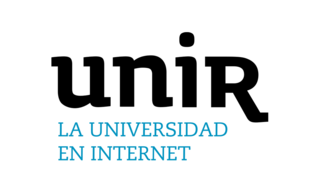

_Máster Universitario en Inteligencia Artificial_

_Trabajo Fin de Máster_

- Gustavo Mateos Santos
- gustavo.mateos830@comunidadunir.net

# Clasificación automática de estrellas variables con modelos Transformer aplicados a series temporales



In [2]:
# Install missing packages
%pip install torch lightkurve
%pip install -q pyarrow

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 13.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 34.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 114.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.7/738.7 kB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.4/999.4 kB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 43.1 MB/s eta 0:00:00 0:00:01
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11428 sha256=7a1c0c198fcd5b6d325211ca045f7e490a1f57d14f4fd405ac819d3c8488574e
  Stored in directory: /home/ec2-user/.cache/pip/wheels/3c/ea/60/8d1c9fbbc99492a1775b36a5e29c8c1ef309cc5821bd5a219d
  Created wheel for memoization: filen

In [3]:
import torch, lightkurve as lk

print("Torch:", torch.__version__)
print("Lightkurve:", lk.__version__)

Torch: 2.2.2
Lightkurve: 2.5.0


## **Fase 2: Diseño e Implementación del Modelo Transformer**

Tras haber finalizado la **Fase 1 (Recopilación y preparación de datos)**, donde hemos generado un conjunto consolidado y etiquetado a partir de diversas misiones espaciales (Kepler, K2, TESS), el siguiente paso definido claramente en la memoria es la implementación de la **Fase 2**:

Aquí se menciona específicamente:

* **Arquitectura Transformer especializada**, adaptada a series temporales astronómicas.
* Implementación técnica con PyTorch en entorno local (VSCode).
* Exploración e incorporación de técnicas avanzadas:
  * Codificación posicional rotatoria (*Rotary Positional Encoding*).
  * Mecanismos de atención jerárquica (*Multi-head Self-Attention*).
  * Técnicas de *transfer learning* usando modelos preentrenados como **ASTROMER** para mejorar la generalización en casos de datos limitados o escasos.

### ⚙️ Pasos concretos ajustados al estado actual del trabajo:

1. **Preparación final del dataset consolidado** (*ya realizada con éxito*):
   * `all_missions_labeled.parquet` generado, validado y listo.

2. **Preprocesamiento para Modelo Transformer** (*inmediato*):
   * Normalización individual por curva (por ejemplo, estándar Z-Score o min-max).
   * Segmentación o padding de las curvas para homogeneizar longitud.
   * Opcional: generación de embeddings iniciales (si decides usar ASTROMER).

3. **Diseño Arquitectónico Inicial del Modelo**:
   * Entrada: secuencia temporal de magnitudes (+ potencialmente metadatos adicionales).
   * Embedding lineal inicial.
   * Codificación posicional rotatoria.
   * Bloques de atención jerárquica multi-cabezal.
   * Capas finales para clasificación multiclase usando salida "softmax".

4. **Implementación técnica**:
   * Desarrollo del modelo en PyTorch (en tu entorno local VSCode ya configurado).
   * Uso de GPU en AWS SageMaker para entrenamientos largos o con muchos datos.

5. **Entrenamiento y validación inicial del modelo**:
   * División del dataset en entrenamiento, validación y prueba.
   * Evaluación sistemática usando métricas definidas (Accuracy, Recall, F1-score).

El paso más lógico y urgente, dado el avance actual, es comenzar inmediatamente la implementación técnica del modelo Transformer descrito anteriormente. De hecho, sería idóneo empezar con un script base (`script_8_train_transformer.py`) en PyTorch que:

* Cargue datos desde el fichero final consolidado (`all_missions_labeled.parquet`).
* Realice la normalización y segmentación (preprocesamiento).
* Construya la arquitectura Transformer básica propuesta.
* Ejecute entrenamiento inicial y validación para comprobar su funcionamiento.

#### 🚨 Consideración importante sobre transfer learning:

En la memoria se destaca claramente la relevancia del uso de modelos preentrenados, particularmente **ASTROMER**, para aprovechar embeddings preaprendidos y mejorar la generalización del modelo. Se recomendaría evaluar claramente incorporar este paso desde ahora, ya que podría acelerar la convergencia del entrenamiento y mejorar resultados iniciales.

#### 📋 Plan posterior (según tu TFM):

Tras la implementación y validación básica del Transformer, seguirían:

* **Fase 3**: Evaluación experimental comparativa contra CNN y LSTM.
* **Fase 4**: Evaluación de robustez ante incertidumbres (curvas incompletas, ruido, muestreo irregular).
* **Fase 5**: Análisis crítico, síntesis y propuestas futuras de mejora.



#### 📚 **1. Citación del uso de ASTROMER en la Memoria (Capítulo 6)**

Correcto. El uso de ASTROMER debe ser claramente citado en la memoria del TFM. En el capítulo 6, donde describas el diseño e implementación del modelo, deberías incluir explícitamente algo similar a:

> Para aprovechar las ventajas del aprendizaje por transferencia en series temporales astronómicas, se ha utilizado el modelo preentrenado **ASTROMER** desarrollado por Fang et al. (2022), disponible públicamente en el repositorio de GitHub ([https://github.com/IShengFang/ASTROMER](https://github.com/IShengFang/ASTROMER)).

Luego, en la bibliografía añadirás la referencia completa, por ejemplo en formato APA:

> Fang, I. S., Teyssier, D., & Longo, G. (2022). **ASTROMER**: A Transformer-based Embedding for Astronomical Time Series. Recuperado de [https://github.com/IShengFang/ASTROMER](https://github.com/IShengFang/ASTROMER)

Esto garantiza la transparencia y buenas prácticas en tu trabajo académico.

In [1]:
import pyarrow.dataset as ds
import pandas as pd

dataset = ds.dataset("data/processed/all_missions_labeled.parquet")
scanner = dataset.scanner(columns=["id_objeto"])

lengths = []
for batch in scanner.to_batches():
    df_batch = batch.to_pandas()
    lengths.append(df_batch.groupby('id_objeto').size())

all_lengths = pd.concat(lengths)
print(all_lengths.describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99]))


count     26437.000000
mean       9514.005523
std        7929.330408
min           3.000000
50%        8242.000000
75%       13771.000000
90%       17275.000000
95%       19273.400000
99%       36005.720000
max      131072.000000
dtype: float64



📌 **Adaptaciones necesarias para la memoria del TFM (capítulo 6):**

En la próxima redacción de tu capítulo 6 debes mencionar explícitamente:

-   **Cambio de ASTROMER a AstroConformer** (motivado por disponibilidad).
-   **Justificación técnica** del uso de máscaras de atención (gestión eficiente de curvas de longitud variable).
-   **Detalles técnicos de implementación** de AstroConformer y la gestión eficiente de memoria usando PyArrow.

#### 🎓 Objetivo del TFM:

**Entrenar tu propio Transformer sobre curvas de luz completas**, usando **transfer learning con AstroConformer**.

#### ¿Qué significa entonces aplicar *transfer learning* desde AstroConformer?

1. **Usar AstroConformer preentrenado como bloque de codificación de secuencias**:

   * No lo usas solo como extractor de un vector resumen por curva.
   * Lo usas **para procesar secuencias completas**: pasa la curva entera, y extrae **embeddings intermedios** (por ejemplo, las salidas de cada paso de tiempo).

2. **Congelar o afinar (fine-tune) sus pesos** durante el entrenamiento de tu modelo.

   * Si congelas: aprovechas lo aprendido sin tocarlo.
   * Si haces fine-tuning: permites que se adapte a tu nuevo conjunto de clases.

3. **Añadir una cabeza de clasificación propia** sobre el output del encoder de AstroConformer.

   * Es decir, el modelo final sería algo como:

     ```
     curva de luz --> AstroConformer --> [CLS] embedding o secuencia completa --> capa lineal --> clases
     ```

La **opción correcta** en lugar de usar *nuestro propio Transformer desde cero*, el **bloque encoder será AstroConformer**, cargado con pesos preentrenados.

En `script_2_transformer_training.py`:

* Cargas AstroConformer como `encoder`.
* Le pasas `x` y `mask` como entrada.
* Añades tu cabeza de clasificación (`nn.Linear(...)`).
* Entrenas usando `train_loader` y `val_loader`.

In [1]:
import sys
import os

# Añadir el directorio src al path
script_dir = os.path.abspath("src")
if script_dir not in sys.path:
    sys.path.append(script_dir)

from src.fase2.script_1_transformer_preprocessing import main as transformer_preprocessing

# Ejecutar una prueba limitada a 200 objetos
train_loader, val_loader = transformer_preprocessing(
    seq_length=20000,
    batch_size=64,
    num_workers=8,
    limit_objects=200,
    device="cpu"
)


📂 Cargando datos en lotes con PyArrow...
🔍 Limitando procesamiento a los primeros 200 objetos
🚀 Procesando 200 curvas en paralelo usando 8 CPUs...
✅ Datos preparados como secuencias normalizadas y máscaras.


**Validación del primer batch de entrenamiento**:

In [1]:
# Extraer el primer batch del loader
for batch in train_loader:
    x, y, mask = batch
    print("🔍 Batch de entrenamiento:")
    print(f"- x.shape       : {x.shape}")
    print(f"- y.shape       : {y.shape}")
    print(f"- mask.shape    : {mask.shape}")
    print(f"- x[0, :10]     : {x[0, :10]}")  # primeros 10 pasos de la curva 0
    print(f"- mask[0, :20]  : {mask[0, :20]}")  # primeros 20 elementos de la máscara
    print(f"- y[0] (clase)  : {y[0]}")
    break  # solo inspeccionar el primer batch


NameError: name 'train_loader' is not defined

| Variable    | Forma esperada             | Resultado     | ✅ Estado |
| ----------- | -------------------------- | ------------- | -------- |
| `x`         | `(batch_size, seq_length)` | `(64, 20000)` | ✅ Ok     |
| `mask`      | `(batch_size, seq_length)` | `(64, 20000)` | ✅ Ok     |
| `y`         | `(batch_size,)`            | `(64,)`       | ✅ Ok     |
| `x[0][:10]` | valores normalizados       | valores ∈ ℝ   | ✅ Ok     |
| `mask[0]`   | 1s en datos reales         | todo `1.0`    | ✅ Ok     |


**Ejecución para todos los objetos**:

In [ ]:
import pyarrow.dataset as ds

dataset = ds.dataset("data/processed/all_missions_labeled.parquet", format="parquet")
scanner = dataset.scanner(columns=["id_objeto"])
unique_ids = set()

for batch in scanner.to_batches():
    df = batch.to_pandas()
    unique_ids.update(df["id_objeto"].dropna().unique())

print(f"🔎 Objetos únicos detectados: {len(unique_ids)}")


🔎 Objetos únicos detectados: 13415


In [1]:
import sys
import os

# Añadir el directorio src al path
script_dir = os.path.abspath("src")
if script_dir not in sys.path:
    sys.path.append(script_dir)

from src.fase2.script_1_transformer_preprocessing import main as transformer_preprocessing

# Ejecutar una prueba con todos los objetos
train_loader, val_loader = transformer_preprocessing(
    seq_length=20000,
    batch_size=64,
    num_workers=8,
    device="cpu",
    limit_objects=None
)

📂 Cargando datos en lotes con PyArrow...


FileNotFoundError: data/processed/all_missions_labeled.parquet

**Guardado de los datasets de la celda anterior, serializados para poder recuperarlos si se reinicia el Kernel**: 

In [2]:
import torch

# Guardar datasets serializados para no perderlos al reiniciar el kernel
torch.save(train_loader.dataset, "data/train/train_dataset.pt")
torch.save(val_loader.dataset, "data/train/val_dataset.pt")

🧠 `script_2_transformer_training.py`:

#### ✅ ¿Qué hace este script?

1. Carga **AstroConformer** como encoder con la configuración oficial (`default_config.yaml`).
2. Añade una **capa lineal de clasificación**.
3. Utiliza los **DataLoaders preparados** (`train_loader`, `val_loader`).
4. Soporta entrenamiento en **CPU o GPU (`device`)**.
5. Muestra **métricas detalladas** por clase en validación.

In [3]:
# Mostrar clases codificadas presentes en el dataset
clase_ids_unicos = sorted(set([y.item() for _, y, _ in train_loader.dataset]))
print(f"🎯 Clases codificadas presentes en train_loader: {clase_ids_unicos}")
print(f"🔢 Número de clases distintas detectadas: {len(clase_ids_unicos)}")

clase_ids_unicos = sorted(set([y.item() for _, y, _ in val_loader.dataset]))
print(f"🎯 Clases codificadas presentes en val_loader: {clase_ids_unicos}")
print(f"🔢 Número de clases distintas detectadas: {len(clase_ids_unicos)}")

🎯 Clases codificadas presentes en train_loader: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
🔢 Número de clases distintas detectadas: 10
🎯 Clases codificadas presentes en val_loader: [1, 2, 3, 4, 5, 6, 7, 8, 9]
🔢 Número de clases distintas detectadas: 9


In [4]:
import torch
import numpy as np

train_dataset = torch.load("data/train/train_dataset.pt", weights_only=False)
val_dataset = torch.load("data/train/val_dataset.pt", weights_only=False)

# Comprobar si hay valores infinitos en el dataset de entrenamiento
# y mostrar estadísticas de los tensores
print("🔍 Comprobando valores infinitos en el dataset de entrenamiento...")
for i in range(len(train_dataset)):
    x, y, mask = train_dataset[i]
    if torch.isinf(x).any():
        print(f"⚠️ Inf detectado en muestra {i} (clase {y})")
        print(f"x.mean: {x.mean()}, std: {x.std()}, max: {x.max()}, min: {x.min()}")

# Comprobar si hay valores infinitos en el dataset de validación
print("🔍 Comprobando valores infinitos en el dataset de validación...")
for i in range(len(val_dataset)):
    x, y, mask = val_dataset[i]
    if torch.isinf(x).any():
        print(f"⚠️ Inf detectado en muestra {i} (clase {y})")
        print(f"x.mean: {x.mean()}, std: {x.std()}, max: {x.max()}, min: {x.min()}")


🔍 Comprobando valores infinitos en el dataset de entrenamiento...
🔍 Comprobando valores infinitos en el dataset de validación...


🔄 Restaurando datasets...
🔄 Cargando datasets completos...
🚀 Entrenando modelo...
Label encoder (clase → índice): {'Cataclysmic': 0, 'Delta Scuti': 1, 'Eclipsing Binary': 2, 'Irregular': 3, 'Other': 4, 'RR Lyrae': 5, 'Rotational': 6, 'Variable': 7, 'White Dwarf': 8, 'Young Stellar Object': 9}
Número de clases: 10
Valores únicos en etiquetas: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Máximo índice: 9


Entrenando:   2%|▏         | 1/50 [01:26<1:10:15, 86.03s/it]


🧪 Epoch 1/50
Loss entrenamiento: 2.2786
Loss validación  : 2.4274

📊 Clasificación (val):
Clase        0: Precisión=0.00  Recall=0.00  F1=0.00
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.14  Recall=0.00  F1=0.00
Clase        3: Precisión=0.00  Recall=0.40  F1=0.01
Clase        4: Precisión=0.63  Recall=0.97  F1=0.76
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.00  Recall=0.00  F1=0.00
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.08  Recall=0.14  F1=0.08
Clase weighted avg: Precisión=0.31  Recall=0.36  F1=0.28
💾 Modelo mejorado guardado (mejor_modelo.pt).
🕒 Epoch 1/50 completada. Train loss: 2.2786, Val loss: 2.4274


Entrenando:   4%|▍         | 2/50 [02:49<1:07:49, 84.78s/it]


🧪 Epoch 2/50
Loss entrenamiento: 2.1630
Loss validación  : 2.3045

📊 Clasificación (val):
Clase        0: Precisión=0.00  Recall=0.00  F1=0.00
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.20  Recall=0.00  F1=0.01
Clase        3: Precisión=0.00  Recall=0.10  F1=0.00
Clase        4: Precisión=0.52  Recall=0.97  F1=0.68
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.00  Recall=0.00  F1=0.00
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.07  Recall=0.11  F1=0.07
Clase weighted avg: Precisión=0.30  Recall=0.36  F1=0.25
💾 Modelo mejorado guardado (mejor_modelo.pt).
🕒 Epoch 2/50 completada. Train loss: 2.1630, Val loss: 2.3045


Entrenando:   6%|▌         | 3/50 [04:13<1:06:05, 84.36s/it]


🧪 Epoch 3/50
Loss entrenamiento: 2.0593
Loss validación  : 2.2514

📊 Clasificación (val):
Clase        0: Precisión=0.00  Recall=0.00  F1=0.00
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.11  Recall=0.00  F1=0.00
Clase        3: Precisión=0.01  Recall=0.10  F1=0.01
Clase        4: Precisión=0.42  Recall=0.98  F1=0.59
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.00  Recall=0.00  F1=0.00
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.05  Recall=0.11  F1=0.06
Clase weighted avg: Precisión=0.22  Recall=0.36  F1=0.22
💾 Modelo mejorado guardado (mejor_modelo.pt).
🕒 Epoch 3/50 completada. Train loss: 2.0593, Val loss: 2.2514


Entrenando:   8%|▊         | 4/50 [05:37<1:04:32, 84.18s/it]


🧪 Epoch 4/50
Loss entrenamiento: 1.9561
Loss validación  : 2.0989

📊 Clasificación (val):
Clase        0: Precisión=0.00  Recall=0.00  F1=0.00
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.21  Recall=0.01  F1=0.01
Clase        3: Precisión=0.01  Recall=0.10  F1=0.01
Clase        4: Precisión=0.42  Recall=0.98  F1=0.59
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.04  Recall=0.01  F1=0.02
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.07  Recall=0.11  F1=0.06
Clase weighted avg: Precisión=0.27  Recall=0.37  F1=0.23
💾 Modelo mejorado guardado (mejor_modelo.pt).
🕒 Epoch 4/50 completada. Train loss: 1.9561, Val loss: 2.0989


Entrenando:  10%|█         | 5/50 [07:01<1:03:02, 84.06s/it]


🧪 Epoch 5/50
Loss entrenamiento: 1.8672
Loss validación  : 2.0938

📊 Clasificación (val):
Clase        0: Precisión=0.00  Recall=0.00  F1=0.00
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.17  Recall=0.00  F1=0.01
Clase        3: Precisión=0.01  Recall=0.10  F1=0.02
Clase        4: Precisión=0.41  Recall=0.98  F1=0.58
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.06  Recall=0.01  F1=0.02
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.07  Recall=0.11  F1=0.06
Clase weighted avg: Precisión=0.25  Recall=0.37  F1=0.22
💾 Modelo mejorado guardado (mejor_modelo.pt).
🕒 Epoch 5/50 completada. Train loss: 1.8672, Val loss: 2.0938


Entrenando:  12%|█▏        | 6/50 [08:25<1:01:37, 84.03s/it]


🧪 Epoch 6/50
Loss entrenamiento: 1.7802
Loss validación  : 2.0028

📊 Clasificación (val):
Clase        0: Precisión=0.00  Recall=0.00  F1=0.00
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.33  Recall=0.01  F1=0.02
Clase        3: Precisión=0.01  Recall=0.10  F1=0.02
Clase        4: Precisión=0.41  Recall=0.98  F1=0.58
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.04  Recall=0.01  F1=0.02
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.08  Recall=0.11  F1=0.06
Clase weighted avg: Precisión=0.33  Recall=0.37  F1=0.23
💾 Modelo mejorado guardado (mejor_modelo.pt).
🕒 Epoch 6/50 completada. Train loss: 1.7802, Val loss: 2.0028


Entrenando:  14%|█▍        | 7/50 [09:49<1:00:12, 84.01s/it]


🧪 Epoch 7/50
Loss entrenamiento: 1.7084
Loss validación  : 1.9176

📊 Clasificación (val):
Clase        0: Precisión=0.00  Recall=0.00  F1=0.00
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.38  Recall=0.02  F1=0.03
Clase        3: Precisión=0.00  Recall=0.00  F1=0.00
Clase        4: Precisión=0.40  Recall=0.98  F1=0.57
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.27  Recall=0.05  F1=0.08
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.10  Recall=0.10  F1=0.07
Clase weighted avg: Precisión=0.37  Recall=0.38  F1=0.24
💾 Modelo mejorado guardado (mejor_modelo.pt).
🕒 Epoch 7/50 completada. Train loss: 1.7084, Val loss: 1.9176


Entrenando:  16%|█▌        | 8/50 [11:13<58:47, 83.98s/it]  


🧪 Epoch 8/50
Loss entrenamiento: 1.6380
Loss validación  : 1.9769

📊 Clasificación (val):
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.58  Recall=0.02  F1=0.03
Clase        3: Precisión=0.00  Recall=0.00  F1=0.00
Clase        4: Precisión=0.39  Recall=0.98  F1=0.56
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.38  Recall=0.09  F1=0.15
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.15  Recall=0.12  F1=0.08
Clase weighted avg: Precisión=0.48  Recall=0.38  F1=0.24
🕒 Epoch 8/50 completada. Train loss: 1.6380, Val loss: 1.9769


Entrenando:  18%|█▊        | 9/50 [12:37<57:21, 83.95s/it]


🧪 Epoch 9/50
Loss entrenamiento: 1.5782
Loss validación  : 1.8345

📊 Clasificación (val):
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.55  Recall=0.04  F1=0.08
Clase        3: Precisión=0.00  Recall=0.00  F1=0.00
Clase        4: Precisión=0.40  Recall=0.98  F1=0.57
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.47  Recall=0.13  F1=0.21
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.16  Recall=0.13  F1=0.10
Clase weighted avg: Precisión=0.48  Recall=0.40  F1=0.27
💾 Modelo mejorado guardado (mejor_modelo.pt).
🕒 Epoch 9/50 completada. Train loss: 1.5782, Val loss: 1.8345


Entrenando:  20%|██        | 10/50 [14:00<55:55, 83.88s/it]


🧪 Epoch 10/50
Loss entrenamiento: 1.5174
Loss validación  : 1.8581

📊 Clasificación (val):
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.54  Recall=0.03  F1=0.06
Clase        3: Precisión=0.00  Recall=0.00  F1=0.00
Clase        4: Precisión=0.40  Recall=0.99  F1=0.57
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.43  Recall=0.13  F1=0.20
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.15  Recall=0.13  F1=0.09
Clase weighted avg: Precisión=0.47  Recall=0.39  F1=0.26
🕒 Epoch 10/50 completada. Train loss: 1.5174, Val loss: 1.8581


Entrenando:  22%|██▏       | 11/50 [15:24<54:31, 83.88s/it]


🧪 Epoch 11/50
Loss entrenamiento: 1.4609
Loss validación  : 1.7336

📊 Clasificación (val):
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.63  Recall=0.07  F1=0.12
Clase        3: Precisión=0.00  Recall=0.00  F1=0.00
Clase        4: Precisión=0.40  Recall=0.98  F1=0.57
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.46  Recall=0.14  F1=0.21
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.17  Recall=0.13  F1=0.10
Clase weighted avg: Precisión=0.52  Recall=0.41  F1=0.29
💾 Modelo mejorado guardado (mejor_modelo.pt).
🕒 Epoch 11/50 completada. Train loss: 1.4609, Val loss: 1.7336


Entrenando:  24%|██▍       | 12/50 [16:48<53:07, 83.87s/it]


🧪 Epoch 12/50
Loss entrenamiento: 1.4117
Loss validación  : 1.6388

📊 Clasificación (val):
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.70  Recall=0.12  F1=0.20
Clase        3: Precisión=0.00  Recall=0.00  F1=0.00
Clase        4: Precisión=0.42  Recall=0.98  F1=0.58
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.61  Recall=0.14  F1=0.23
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.19  Recall=0.14  F1=0.11
Clase weighted avg: Precisión=0.58  Recall=0.44  F1=0.34
💾 Modelo mejorado guardado (mejor_modelo.pt).
🕒 Epoch 12/50 completada. Train loss: 1.4117, Val loss: 1.6388


Entrenando:  26%|██▌       | 13/50 [18:12<51:42, 83.85s/it]


🧪 Epoch 13/50
Loss entrenamiento: 1.3666
Loss validación  : 1.7628

📊 Clasificación (val):
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.61  Recall=0.05  F1=0.09
Clase        3: Precisión=0.00  Recall=0.00  F1=0.00
Clase        4: Precisión=0.39  Recall=0.99  F1=0.56
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.68  Recall=0.13  F1=0.22
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.19  Recall=0.13  F1=0.10
Clase weighted avg: Precisión=0.52  Recall=0.41  F1=0.28
🕒 Epoch 13/50 completada. Train loss: 1.3666, Val loss: 1.7628


Entrenando:  28%|██▊       | 14/50 [19:36<50:17, 83.83s/it]


🧪 Epoch 14/50
Loss entrenamiento: 1.3219
Loss validación  : 1.6727

📊 Clasificación (val):
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.71  Recall=0.09  F1=0.15
Clase        3: Precisión=0.00  Recall=0.00  F1=0.00
Clase        4: Precisión=0.40  Recall=0.99  F1=0.57
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.71  Recall=0.14  F1=0.23
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.20  Recall=0.13  F1=0.11
Clase weighted avg: Precisión=0.58  Recall=0.42  F1=0.31
🕒 Epoch 14/50 completada. Train loss: 1.3219, Val loss: 1.6727


Entrenando:  30%|███       | 15/50 [21:00<48:53, 83.83s/it]


🧪 Epoch 15/50
Loss entrenamiento: 1.2832
Loss validación  : 1.6457

📊 Clasificación (val):
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.73  Recall=0.09  F1=0.16
Clase        3: Precisión=0.00  Recall=0.00  F1=0.00
Clase        4: Precisión=0.40  Recall=0.99  F1=0.57
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.71  Recall=0.15  F1=0.25
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.20  Recall=0.14  F1=0.11
Clase weighted avg: Precisión=0.59  Recall=0.43  F1=0.32
🕒 Epoch 15/50 completada. Train loss: 1.2832, Val loss: 1.6457


Entrenando:  32%|███▏      | 16/50 [22:23<47:30, 83.82s/it]


🧪 Epoch 16/50
Loss entrenamiento: 1.2433
Loss validación  : 1.6270

📊 Clasificación (val):
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.73  Recall=0.09  F1=0.16
Clase        3: Precisión=0.00  Recall=0.00  F1=0.00
Clase        4: Precisión=0.40  Recall=0.99  F1=0.57
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.74  Recall=0.16  F1=0.27
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.21  Recall=0.14  F1=0.11
Clase weighted avg: Precisión=0.60  Recall=0.43  F1=0.32
💾 Modelo mejorado guardado (mejor_modelo.pt).
🕒 Epoch 16/50 completada. Train loss: 1.2433, Val loss: 1.6270


Entrenando:  34%|███▍      | 17/50 [23:47<46:06, 83.82s/it]


🧪 Epoch 17/50
Loss entrenamiento: 1.2017
Loss validación  : 1.5665

📊 Clasificación (val):
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.68  Recall=0.10  F1=0.17
Clase        3: Precisión=0.00  Recall=0.00  F1=0.00
Clase        4: Precisión=0.40  Recall=0.99  F1=0.57
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.73  Recall=0.17  F1=0.27
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.20  Recall=0.14  F1=0.11
Clase weighted avg: Precisión=0.57  Recall=0.43  F1=0.32
💾 Modelo mejorado guardado (mejor_modelo.pt).
🕒 Epoch 17/50 completada. Train loss: 1.2017, Val loss: 1.5665


Entrenando:  36%|███▌      | 18/50 [25:11<44:42, 83.82s/it]


🧪 Epoch 18/50
Loss entrenamiento: 1.1692
Loss validación  : 1.4375

📊 Clasificación (val):
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.70  Recall=0.14  F1=0.24
Clase        3: Precisión=0.00  Recall=0.00  F1=0.00
Clase        4: Precisión=0.42  Recall=0.98  F1=0.59
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.76  Recall=0.22  F1=0.34
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.21  Recall=0.15  F1=0.13
Clase weighted avg: Precisión=0.59  Recall=0.46  F1=0.37
💾 Modelo mejorado guardado (mejor_modelo.pt).
🕒 Epoch 18/50 completada. Train loss: 1.1692, Val loss: 1.4375


Entrenando:  38%|███▊      | 19/50 [26:35<43:18, 83.82s/it]


🧪 Epoch 19/50
Loss entrenamiento: 1.1353
Loss validación  : 1.3481

📊 Clasificación (val):
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.74  Recall=0.20  F1=0.32
Clase        3: Precisión=0.00  Recall=0.00  F1=0.00
Clase        4: Precisión=0.44  Recall=0.98  F1=0.61
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.76  Recall=0.23  F1=0.36
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.22  Recall=0.16  F1=0.14
Clase weighted avg: Precisión=0.62  Recall=0.49  F1=0.42
💾 Modelo mejorado guardado (mejor_modelo.pt).
🕒 Epoch 19/50 completada. Train loss: 1.1353, Val loss: 1.3481


Entrenando:  40%|████      | 20/50 [27:59<41:54, 83.81s/it]


🧪 Epoch 20/50
Loss entrenamiento: 1.0957
Loss validación  : 1.3819

📊 Clasificación (val):
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.74  Recall=0.15  F1=0.25
Clase        3: Precisión=0.00  Recall=0.00  F1=0.00
Clase        4: Precisión=0.42  Recall=0.98  F1=0.59
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.77  Recall=0.25  F1=0.38
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.21  Recall=0.15  F1=0.14
Clase weighted avg: Precisión=0.61  Recall=0.47  F1=0.38
🕒 Epoch 20/50 completada. Train loss: 1.0957, Val loss: 1.3819


Entrenando:  42%|████▏     | 21/50 [29:23<40:30, 83.81s/it]


🧪 Epoch 21/50
Loss entrenamiento: 1.0689
Loss validación  : 1.5865

📊 Clasificación (val):
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.74  Recall=0.09  F1=0.15
Clase        3: Precisión=0.00  Recall=0.00  F1=0.00
Clase        4: Precisión=0.40  Recall=0.99  F1=0.57
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.73  Recall=0.18  F1=0.29
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.21  Recall=0.14  F1=0.11
Clase weighted avg: Precisión=0.60  Recall=0.43  F1=0.32
🕒 Epoch 21/50 completada. Train loss: 1.0689, Val loss: 1.5865


Entrenando:  44%|████▍     | 22/50 [30:46<39:06, 83.81s/it]


🧪 Epoch 22/50
Loss entrenamiento: 1.0345
Loss validación  : 1.4294

📊 Clasificación (val):
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.76  Recall=0.12  F1=0.21
Clase        3: Precisión=0.00  Recall=0.00  F1=0.00
Clase        4: Precisión=0.41  Recall=0.98  F1=0.58
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.76  Recall=0.22  F1=0.35
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.21  Recall=0.15  F1=0.13
Clase weighted avg: Precisión=0.62  Recall=0.45  F1=0.36
🕒 Epoch 22/50 completada. Train loss: 1.0345, Val loss: 1.4294


Entrenando:  46%|████▌     | 23/50 [32:10<37:42, 83.81s/it]


🧪 Epoch 23/50
Loss entrenamiento: 1.0112
Loss validación  : 1.2847

📊 Clasificación (val):
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.77  Recall=0.25  F1=0.38
Clase        3: Precisión=0.00  Recall=0.00  F1=0.00
Clase        4: Precisión=0.45  Recall=0.98  F1=0.62
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.76  Recall=0.25  F1=0.37
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.22  Recall=0.16  F1=0.15
Clase weighted avg: Precisión=0.64  Recall=0.52  F1=0.46
💾 Modelo mejorado guardado (mejor_modelo.pt).
🕒 Epoch 23/50 completada. Train loss: 1.0112, Val loss: 1.2847


Entrenando:  48%|████▊     | 24/50 [33:34<36:18, 83.80s/it]


🧪 Epoch 24/50
Loss entrenamiento: 0.9795
Loss validación  : 1.2144

📊 Clasificación (val):
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.81  Recall=0.31  F1=0.45
Clase        3: Precisión=0.00  Recall=0.00  F1=0.00
Clase        4: Precisión=0.47  Recall=0.98  F1=0.64
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.78  Recall=0.29  F1=0.43
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.23  Recall=0.18  F1=0.17
Clase weighted avg: Precisión=0.67  Recall=0.55  F1=0.51
💾 Modelo mejorado guardado (mejor_modelo.pt).
🕒 Epoch 24/50 completada. Train loss: 0.9795, Val loss: 1.2144


Entrenando:  50%|█████     | 25/50 [34:58<34:55, 83.80s/it]


🧪 Epoch 25/50
Loss entrenamiento: 0.9548
Loss validación  : 1.3132

📊 Clasificación (val):
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.77  Recall=0.16  F1=0.27
Clase        3: Precisión=0.00  Recall=0.00  F1=0.00
Clase        4: Precisión=0.42  Recall=0.98  F1=0.59
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.75  Recall=0.26  F1=0.38
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.22  Recall=0.16  F1=0.14
Clase weighted avg: Precisión=0.63  Recall=0.47  F1=0.39
🕒 Epoch 25/50 completada. Train loss: 0.9548, Val loss: 1.3132


Entrenando:  52%|█████▏    | 26/50 [36:22<33:31, 83.81s/it]


🧪 Epoch 26/50
Loss entrenamiento: 0.9344
Loss validación  : 1.3163

📊 Clasificación (val):
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.78  Recall=0.15  F1=0.26
Clase        3: Precisión=0.00  Recall=0.00  F1=0.00
Clase        4: Precisión=0.42  Recall=0.98  F1=0.59
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.76  Recall=0.27  F1=0.40
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.22  Recall=0.16  F1=0.14
Clase weighted avg: Precisión=0.63  Recall=0.47  F1=0.39
🕒 Epoch 26/50 completada. Train loss: 0.9344, Val loss: 1.3163


Entrenando:  54%|█████▍    | 27/50 [37:45<32:07, 83.81s/it]


🧪 Epoch 27/50
Loss entrenamiento: 0.9062
Loss validación  : 1.2817

📊 Clasificación (val):
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.77  Recall=0.17  F1=0.28
Clase        3: Precisión=0.00  Recall=0.00  F1=0.00
Clase        4: Precisión=0.43  Recall=0.98  F1=0.59
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.77  Recall=0.27  F1=0.40
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.22  Recall=0.16  F1=0.14
Clase weighted avg: Precisión=0.63  Recall=0.48  F1=0.40
🕒 Epoch 27/50 completada. Train loss: 0.9062, Val loss: 1.2817


Entrenando:  56%|█████▌    | 28/50 [39:09<30:43, 83.80s/it]


🧪 Epoch 28/50
Loss entrenamiento: 0.8825
Loss validación  : 1.3022

📊 Clasificación (val):
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.83  Recall=0.16  F1=0.26
Clase        3: Precisión=0.00  Recall=0.00  F1=0.00
Clase        4: Precisión=0.42  Recall=0.98  F1=0.59
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.75  Recall=0.26  F1=0.38
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.22  Recall=0.16  F1=0.14
Clase weighted avg: Precisión=0.65  Recall=0.47  F1=0.39
🕒 Epoch 28/50 completada. Train loss: 0.8825, Val loss: 1.3022


Entrenando:  56%|█████▌    | 28/50 [40:33<31:51, 86.91s/it]


🧪 Epoch 29/50
Loss entrenamiento: 0.8620
Loss validación  : 1.2644

📊 Clasificación (val):
Clase        1: Precisión=0.00  Recall=0.00  F1=0.00
Clase        2: Precisión=0.79  Recall=0.16  F1=0.27
Clase        3: Precisión=0.00  Recall=0.00  F1=0.00
Clase        4: Precisión=0.42  Recall=0.98  F1=0.59
Clase        5: Precisión=0.00  Recall=0.00  F1=0.00
Clase        6: Precisión=0.77  Recall=0.27  F1=0.40
Clase        7: Precisión=0.00  Recall=0.00  F1=0.00
Clase        8: Precisión=0.00  Recall=0.00  F1=0.00
Clase        9: Precisión=0.00  Recall=0.00  F1=0.00
Clase macro avg: Precisión=0.22  Recall=0.16  F1=0.14
Clase weighted avg: Precisión=0.64  Recall=0.47  F1=0.40
⏹️ Early stopping activado tras 5 épocas sin mejora.


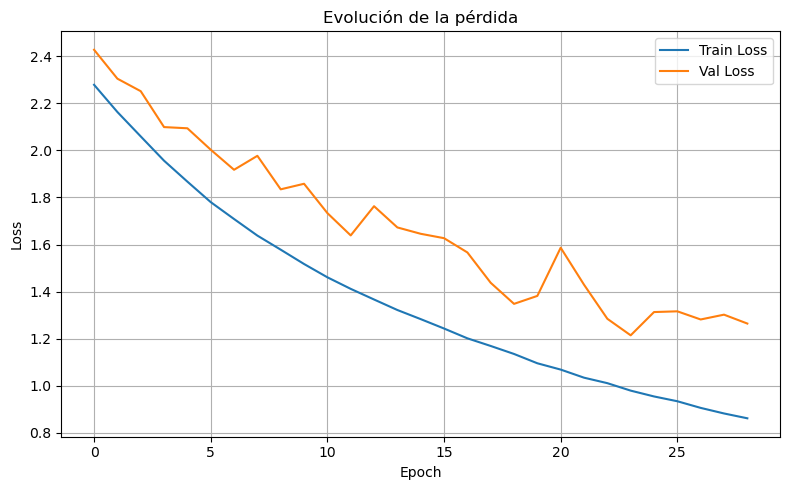

In [1]:
from src.fase2.script_2_transformer_training import main as train_model
import torch

# Restaurar datasets y reconstruir DataLoaders
from torch.utils.data import DataLoader

# Detectar dispositivo
device = "cuda" if torch.cuda.is_available() else "cpu"

print("🔄 Restaurando datasets...")
train_dataset = torch.load("data/train/train_dataset.pt")
val_dataset = torch.load("data/train/val_dataset.pt")

# Cargar datasets completos
print("🔄 Cargando datasets completos...")

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
    
# Calcular número de clases
num_classes = len(set([y.item() for _, y, _ in train_loader.dataset]))

# Ejecutar entrenamiento con early stopping y gráfica
print("🚀 Entrenando modelo...")
model = train_model(
    train_loader=train_loader,
    val_loader=val_loader,
    num_classes=num_classes,
    device=device,
    epochs=50,
    lr=1e-5,
    freeze_encoder=True,# transfer learning clásico
    patience=5,         # early stopping
    debug=False         # True para depuración
)

#### 🔍 Análisis de errores

Análisis claro de los errores de clasificación (ver `/outputs/errores_mal_clasificados.csv`):

🔹 **Errores frecuentes**

* **Eclipsing Binary → Other**: 🔥 1173 errores
* **Rotational → Other**: 125 errores
* **Rotational → Eclipsing Binary**: 41 errores
* **Delta Scuti → Other**: 13 errores

➡️ **El modelo tiende a sobregeneralizar hacia la clase “Other”**, especialmente para estrellas que en realidad pertenecen a clases bien definidas como EB o Rotational.

📈 Estadísticas de dispersión (ver matriz de confusion en `outputs/output1_matriz_confusion.png`)

* Los errores `Rotational → Eclipsing Binary` tienen desviación estándar alta (`std ≈ 41.34`), lo que sugiere variabilidad intensa que puede parecer eclipses.
* Los errores de `Delta Scuti → Rotational` tienen incluso `std > 100`, que no es típico de pulsaciones suaves.

#### ✅ Fine-tuning (`fine_tuning.py`)

1. **Descongelar el encoder (`freeze_encoder=False`)**
2. Usar un **learning rate bajo** (ej. `5e-6` o `1e-6`)
3. Aplicar `early stopping` más agresivo (ej. `patience=3`)
4. Entrenar con `epochs=10–20` y guardar el nuevo mejor modelo de nuevo

✅ Modelo base cargado desde outputs/mejor_modelo.pt


Fine-tuning:   0%|          | 0/15 [00:00<?, ?it/s]


🧪 Epoch 1/15
Train loss: 0.5832, Val loss: 0.8442
Train acc: 0.8813, Val acc: 0.6993
💾 Guardado mejor modelo afinado (outputs/mejor_modelo_finetuned.pt)

🧪 Epoch 2/15
Train loss: 0.3907, Val loss: 0.7901
Train acc: 0.9164, Val acc: 0.7046
💾 Guardado mejor modelo afinado (outputs/mejor_modelo_finetuned.pt)

🧪 Epoch 3/15
Train loss: 0.3568, Val loss: 0.4963
Train acc: 0.9188, Val acc: 0.8811
💾 Guardado mejor modelo afinado (outputs/mejor_modelo_finetuned.pt)

🧪 Epoch 4/15
Train loss: 0.3307, Val loss: 0.4652
Train acc: 0.9241, Val acc: 0.9069
💾 Guardado mejor modelo afinado (outputs/mejor_modelo_finetuned.pt)

🧪 Epoch 5/15
Train loss: 0.3177, Val loss: 0.6011
Train acc: 0.9264, Val acc: 0.7752

🧪 Epoch 6/15
Train loss: 0.3062, Val loss: 0.4738
Train acc: 0.9289, Val acc: 0.8669

🧪 Epoch 7/15
Train loss: 0.2993, Val loss: 0.4162
Train acc: 0.9287, Val acc: 0.9218
💾 Guardado mejor modelo afinado (outputs/mejor_modelo_finetuned.pt)

🧪 Epoch 8/15
Train loss: 0.2900, Val loss: 1.7421
Train a

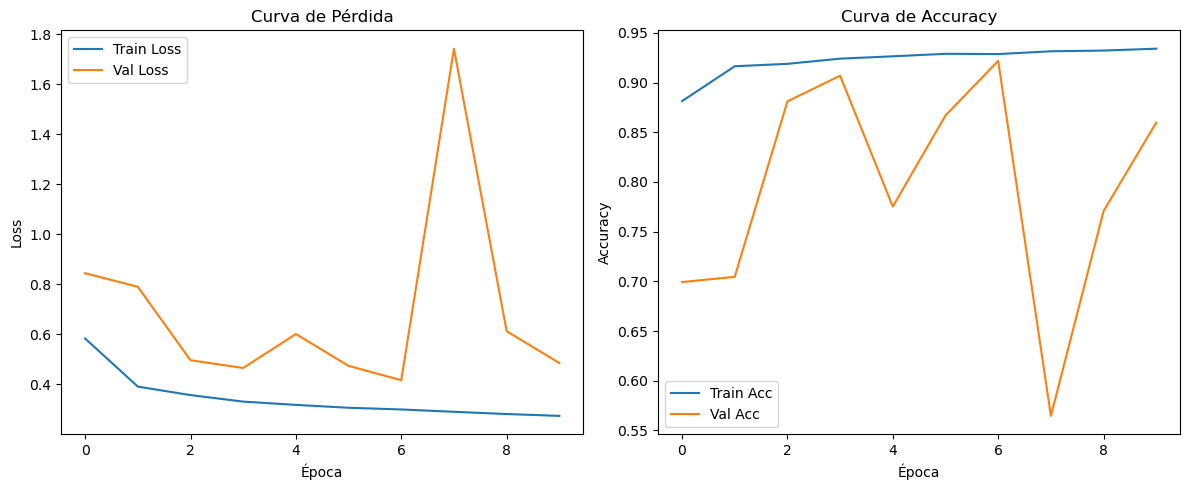

ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of labels (10).

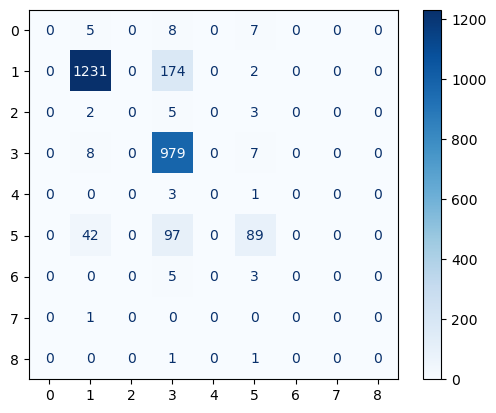

In [1]:
from src.fase2.fine_tuning import main as fine_tuned_model
import torch
from torch.utils.data import DataLoader
import pickle

train_dataset = torch.load("data/train/train_dataset.pt")
val_dataset = torch.load("data/train/val_dataset.pt")

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

label_encoder = pickle.load(open("data/train/label_encoder.pkl", "rb"))
num_classes = len(label_encoder)

model = fine_tuned_model(train_loader, val_loader, num_classes, device="cuda")

### AJUSTES Y MEJORAS

#### ✅ ENTRENAMIENTO (`script_2_transformer_training_optimizado.py`)

-   **Ponderar la `loss` por clase**:
-   **Early stopping + warmup**:
    -   Empieza con `lr=1e-6`, sube gradualmente.
    -   Aplica `ReduceLROnPlateau` si no mejora en 3 épocas.      
-   **Dropout más agresivo** (0.2 o 0.3).
-   **Aumentar el batch size** (si GPU lo permite) para más estabilidad.
    
#### ✅ FINE-TUNING (`fine_tuning_optimizado`)

-   **Solo descongelar partes específicas del encoder** (últimas capas).   
-   Aplicar **diferentes `lr`** para encoder y cabeza de clasificación (con `param_groups`).
-   Añadir `label smoothing` (`CrossEntropyLoss(label_smoothing=0.1)` en PyTorch 1.10+).

#### **Pruebas para conseguir mejoras de métricas y refuerzo de clases minoritarias**:

🔧 BLOQUE 1 — AUMENTAR CAPACIDAD DEL MODELO

| Acción              | Motivo                                                             | Esperado                              |
| ------------------- | ------------------------------------------------------------------ | ------------------------------------- |
| ✅ `hidden_dim=256`  | Mayor capacidad representacional para aprender clases minoritarias | ↑ F1 en Rotational, RR Lyrae          |
| ✅ `num_layers=6`    | Profundidad para capturar relaciones complejas                     | ↑ Recall en clases poco representadas |
| ✅ `encoder_dim=192` | Mejora del embedding antes del classifier                          | ↑ Separación entre clases             |

🔍 Puntos clave revisados del script:

✔️ Usa correctamente AstroConformer (se importa y configura).

✔️ Congelación del encoder cuando se indica (freeze_encoder=True).

✔️ Cálculo de class_weights con CrossEntropyLoss balanceada.

✔️ ReduceLROnPlateau con paciencia adicional (patience=3) y reducción de LR.

✔️ Guarda el modelo cuando mejora (mejor_modelo_optimizado.pt).

✔️ Aplica early stopping si no hay mejora en val_loss durante patience épocas.

✔️ Exporta las curvas de loss y accuracy como outputs/curvas_entrenamiento_optimizado.png.

Script **fine-tuning optimizado**:

🔧 Carga del modelo base

* ✅ `mejor_modelo_optimizado.pt` se carga correctamente.
* ✅ `freeze_encoder=False` activa el entrenamiento completo (head + encoder).
* ✅ Se define correctamente `AstroConformerClassifier`.

📉 Entrenamiento y validación

* ✅ Usa `label_smoothing=0.1` en `CrossEntropyLoss` → ayuda contra overfitting.
* ✅ Doble `learning_rate` diferenciando encoder y classifier (congelados o no).
* ✅ `accuracy_score`, `classification_report` y `confusion_matrix` están correctamente integrados.
* ✅ `early stopping` con `patience=3`.

📊 Resultados y exportación

* ✅ Curvas de pérdida y accuracy se guardan:
  `outputs/curvas_finetuning_optimizado.png`
* ✅ Matriz de confusión con etiquetas se guarda:
  `outputs/matriz_confusion_finetuning_optimizado.png`
* ✅ Reporte de errores mal clasificados:
  `outputs/errores_mal_clasificados.csv`
* ✅ Soporta modo `debug=True` para pruebas rápidas.

**Balanceo de clases en métricas finales**
   Imprimir el `classification_report` en consola:

   ```python
   print(classification_report(val_true, val_preds, target_names=class_names, zero_division=0))
   ```

Matplotlib is building the font cache; this may take a moment.


🔄 Restaurando datasets...
🔄 Cargando datasets completos...
🚀 Entrenando modelo optimizado...


Entrenamiento del modelo:   0%|          | 0/50 [00:00<?, ?it/s]


🧪 Epoch 1/50
Train loss: 2.4927, Val loss: 2.3286
Train acc: 0.1288, Val acc: 0.3260
💾 Guardado modelo mejorado en outputs/mejor_modelo_optimizado.pt

🧪 Epoch 2/50
Train loss: 2.4863, Val loss: 2.2606
Train acc: 0.1348, Val acc: 0.3563
💾 Guardado modelo mejorado en outputs/mejor_modelo_optimizado.pt

🧪 Epoch 3/50
Train loss: 2.4663, Val loss: 2.2722
Train acc: 0.1442, Val acc: 0.3372

🧪 Epoch 4/50
Train loss: 2.4418, Val loss: 2.2130
Train acc: 0.1490, Val acc: 0.3436
💾 Guardado modelo mejorado en outputs/mejor_modelo_optimizado.pt

🧪 Epoch 5/50
Train loss: 2.4254, Val loss: 2.2145
Train acc: 0.1639, Val acc: 0.3473

🧪 Epoch 6/50
Train loss: 2.4097, Val loss: 2.2127
Train acc: 0.1772, Val acc: 0.4044
💾 Guardado modelo mejorado en outputs/mejor_modelo_optimizado.pt

🧪 Epoch 7/50
Train loss: 2.3687, Val loss: 2.2003
Train acc: 0.1842, Val acc: 0.2757
💾 Guardado modelo mejorado en outputs/mejor_modelo_optimizado.pt

🧪 Epoch 8/50
Train loss: 2.3514, Val loss: 2.2005
Train acc: 0.1965, Val

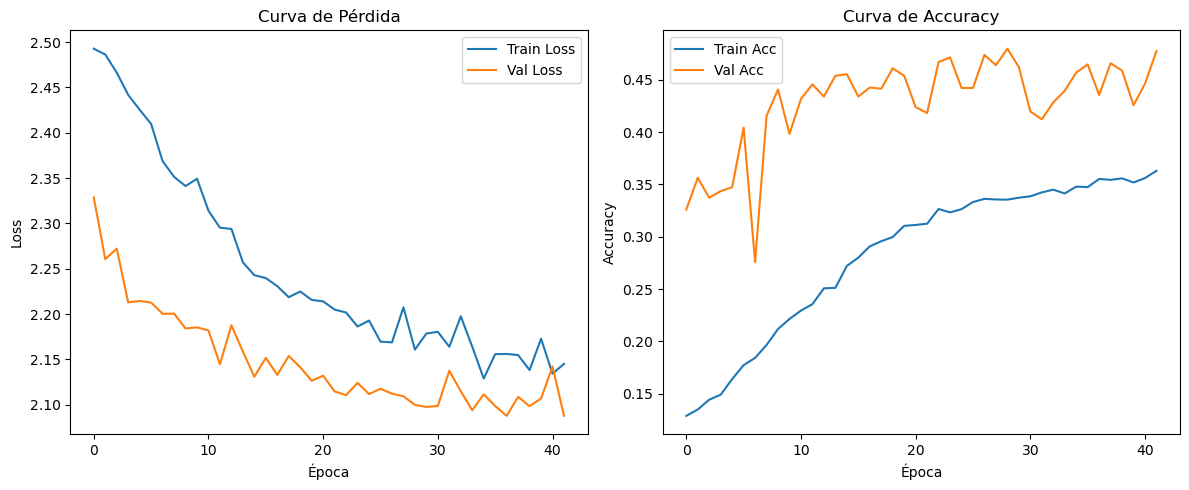

In [1]:
from src.fase2.script_2_transformer_training_optimizado import main as train_model_optimized
import torch
import pickle
# Restaurar datasets y reconstruir DataLoaders
from torch.utils.data import DataLoader

# Detectar dispositivo
device = "cuda" if torch.cuda.is_available() else "cpu"

print("🔄 Restaurando datasets...")
train_dataset = torch.load("data/train/train_dataset.pt")
val_dataset = torch.load("data/train/val_dataset.pt")

# Cargar datasets completos
print("🔄 Cargando datasets completos...")
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    
# Calcular número de clases
label_encoder = pickle.load(open("data/train/label_encoder.pkl", "rb"))
num_classes = len(label_encoder)

# Ejecutar entrenamiento optimizado: 
# Ponderación por clase con class_weight
# dropout=0.3
# Scheduler ReduceLROnPlateau
# Early stopping
# Curvas de pérdida y accuracy
print("🚀 Entrenando modelo optimizado...")
model = train_model_optimized(
    train_loader=train_loader,
    val_loader=val_loader,
    num_classes=num_classes,
    device=device,
    epochs=50,
    lr=1e-5,
    freeze_encoder=True, # transfer learning clásico
    patience=5,          # early stopping
    debug=False          # True para depuración
)

🚀 Fine-tuning sobre mejor modelo optimizado...
✅ Modelo cargado desde outputs/mejor_modelo_optimizado.pt


Fine-tuning:   0%|          | 0/20 [00:00<?, ?it/s]


🧪 Epoch 1/20
Train loss: 1.6435, Val loss: 1.3872
Train acc: 0.5201, Val acc: 0.5818
💾 Guardado mejor modelo fine-tuned en outputs/mejor_modelo_finetuned_optimizado.pt

🧪 Epoch 2/20
Train loss: 1.3677, Val loss: 1.2957
Train acc: 0.6027, Val acc: 0.6110
💾 Guardado mejor modelo fine-tuned en outputs/mejor_modelo_finetuned_optimizado.pt

🧪 Epoch 3/20
Train loss: 1.2998, Val loss: 1.2481
Train acc: 0.6126, Val acc: 0.6380
💾 Guardado mejor modelo fine-tuned en outputs/mejor_modelo_finetuned_optimizado.pt

🧪 Epoch 4/20
Train loss: 1.2684, Val loss: 1.2549
Train acc: 0.6308, Val acc: 0.6230

🧪 Epoch 5/20
Train loss: 1.2460, Val loss: 1.4693
Train acc: 0.6365, Val acc: 0.5071

🧪 Epoch 6/20
Train loss: 1.2357, Val loss: 1.3808
Train acc: 0.6375, Val acc: 0.5401
⏹️ Fine-tuning detenido tras 3 épocas sin mejora.


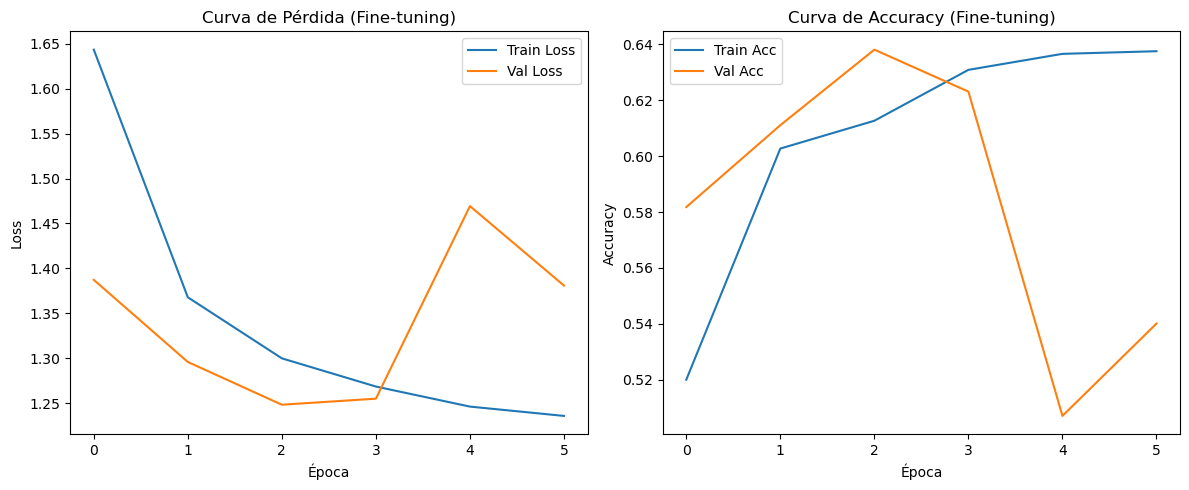

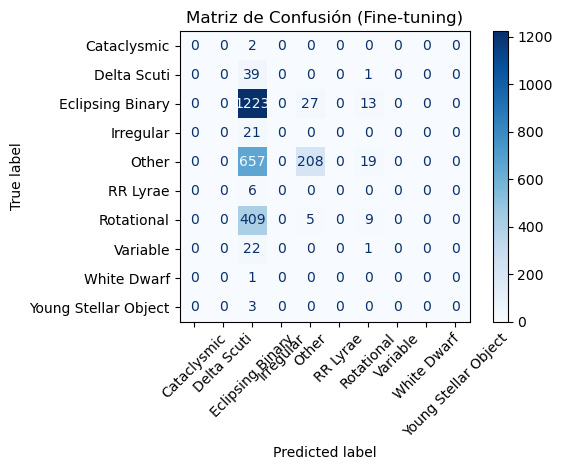

💾 Guardado CSV con errores: outputs/errores_mal_clasificados.csv


In [1]:
from src.fase2.fine_tuning_optimizado import main as fine_tuned_optimized_model
import torch
from torch.utils.data import DataLoader
import pickle
import os
import torch, gc


###################################################
# acciones para resolver los problemas de memoria
# 1. Liberar memoria
gc.collect()
torch.cuda.empty_cache()

# 2. Optimizar fragmentacion
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# 3. Usar batch_size más pequeños (16)
train_dataset = torch.load("data/train/train_dataset.pt")
val_dataset = torch.load("data/train/val_dataset.pt")
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
###################################################

label_encoder = pickle.load(open("data/train/label_encoder.pkl", "rb"))
num_classes = len(label_encoder)

# Fine-tuning optimizado
# Carga desde mejor_modelo_optimizado.pt
# Doble learning rate (encoder: 2e-6, head: 1e-5)
# label_smoothing=0.1
# Curvas de pérdida y accuracy
print("🚀 Fine-tuning sobre mejor modelo optimizado...")
model = fine_tuned_optimized_model(
    train_loader=train_loader,
    val_loader=val_loader,
    num_classes=num_classes,
    device="cuda",
    epochs=20,
    patience=3
)

In [2]:
import pandas as pd
import pickle

# Rutas
errores_csv = "outputs/errores_mal_clasificados.csv"
debug_csv = "data/train/debug_clases_codificadas.csv"
label_encoder_pkl = "data/train/label_encoder.pkl"

# Cargar archivos
df_errores = pd.read_csv(errores_csv)
df_debug = pd.read_csv(debug_csv)

# Cargar diccionario inverso label_encoder
with open(label_encoder_pkl, "rb") as f:
    label_encoder = pickle.load(f)
inverse_encoder = {v: k for k, v in label_encoder.items()}

# Añadir columna de clase_codificada a errores
df_errores["clase_codificada_real"] = df_errores["clase_real"].map(label_encoder)

# Cruzar por índice de posición
errores_idx = df_errores["indice"].values
debug_curvas = df_debug.iloc[errores_idx].reset_index(drop=True)
df_errores["id_objeto"] = debug_curvas["id_objeto"]

# Guardar nuevo CSV enriquecido
output_path = "outputs/errores_mal_clasificados_con_id.csv"
df_errores.to_csv(output_path, index=False)
print(f"✅ CSV enriquecido con id_objeto guardado en: {output_path}")


✅ CSV enriquecido con id_objeto guardado en: outputs/errores_mal_clasificados_con_id.csv


**Pasos para mejorar rendimiento del modelo**:

✅ PASO 1: Refuerzo desde errores mal clasificados

1. Carga `errores_mal_clasificados.csv`.
2. Extrae los `id_objeto` correspondientes (pueden cruzarse con el `.parquet` si se necesita la curva).
3. Recupera las curvas reales asociadas a esos IDs desde los datasets ya existentes.
4. Añádelas al conjunto de entrenamiento (sin duplicar, si ya estaban).

Esto mejorará el foco del modelo sobre regiones de decisión difíciles.

✅ PASO 2:Continuar fine-tuning desde el modelo congelado

Ya que el modelo fue guardado en `outputs/mejor_modelo_finetuned_optimizado.pt`, podemos:

* Cargar ese estado.
* Continuar el fine-tuning con batch size más pequeño (si necesario), menor `lr` (por ejemplo `1e-6` para el head, `5e-7` para el encoder).
* Puedes reducir `label_smoothing` a 0.05 y aumentar `patience` a 5.

Para evitar sobreajuste:

```python
optimizer = optim.AdamW([
    {"params": model.encoder.parameters(), "lr": 5e-7},
    {"params": model.classifier.parameters(), "lr": 1e-6}
])
```

**Entrenamiento con datasets balanceados**: 

Matplotlib is building the font cache; this may take a moment.


🔄 Restaurando datasets...
🔄 Cargando datasets completos...
🚀 Entrenando modelo optimizado...


Entrenamiento del modelo:   0%|          | 0/50 [00:00<?, ?it/s]


🧪 Epoch 1/50
Train loss: 1.8044, Val loss: 1.6238
Train acc: 0.2072, Val acc: 0.3920
💾 Guardado modelo mejorado en outputs/mejor_modelo_optimizado.pt

🧪 Epoch 2/50
Train loss: 1.4419, Val loss: 1.1315
Train acc: 0.3168, Val acc: 0.4122
💾 Guardado modelo mejorado en outputs/mejor_modelo_optimizado.pt

🧪 Epoch 3/50
Train loss: 1.2076, Val loss: 1.1530
Train acc: 0.3828, Val acc: 0.4640

🧪 Epoch 4/50
Train loss: 1.0453, Val loss: 0.9073
Train acc: 0.4348, Val acc: 0.4794
💾 Guardado modelo mejorado en outputs/mejor_modelo_optimizado.pt

🧪 Epoch 5/50
Train loss: 0.9396, Val loss: 0.8327
Train acc: 0.4731, Val acc: 0.4992
💾 Guardado modelo mejorado en outputs/mejor_modelo_optimizado.pt

🧪 Epoch 6/50
Train loss: 0.8624, Val loss: 0.7355
Train acc: 0.4919, Val acc: 0.5259
💾 Guardado modelo mejorado en outputs/mejor_modelo_optimizado.pt

🧪 Epoch 7/50
Train loss: 0.7949, Val loss: 0.6918
Train acc: 0.5105, Val acc: 0.5473
💾 Guardado modelo mejorado en outputs/mejor_modelo_optimizado.pt

🧪 Epoch

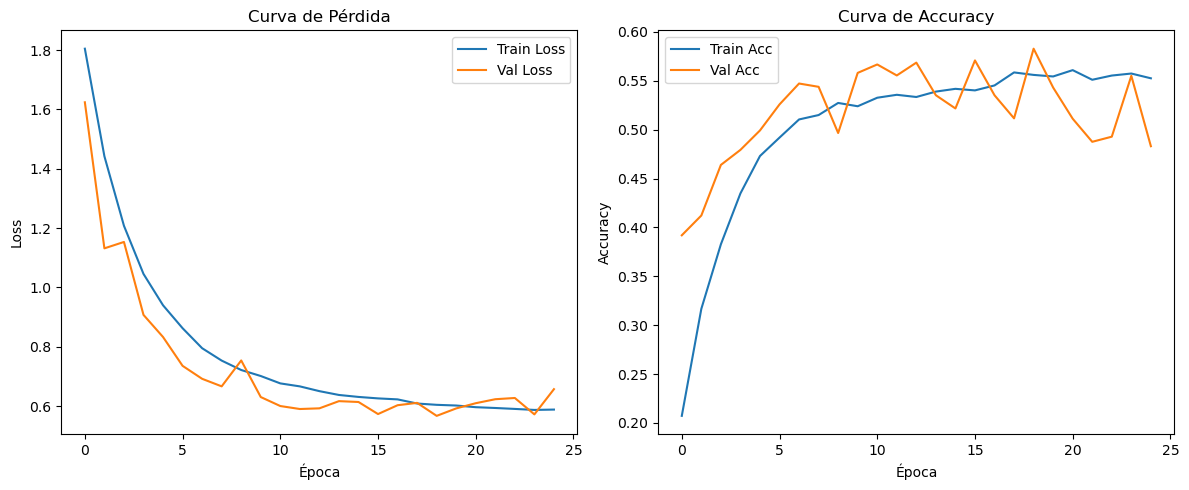

In [1]:
from src.fase2.script_2_transformer_training_optimizado2 import main as train_model_optimized2
import torch
import pickle
# Restaurar datasets y reconstruir DataLoaders
from torch.utils.data import DataLoader

# Detectar dispositivo
device = "cuda" if torch.cuda.is_available() else "cpu"

print("🔄 Restaurando datasets...")
train_dataset = torch.load("data/train/train_dataset.pt")
val_dataset = torch.load("data/train/val_dataset.pt")

# Cargar datasets completos
print("🔄 Cargando datasets completos...")
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    
# Calcular número de clases
label_encoder = pickle.load(open("data/train/label_encoder.pkl", "rb"))
num_classes = len(label_encoder)

# Ejecutar entrenamiento optimizado: 
# Ponderación por clase con class_weight
# dropout=0.3
# Scheduler ReduceLROnPlateau
# Early stopping
# Curvas de pérdida y accuracy
print("🚀 Entrenando modelo optimizado...")
model = train_model_optimized2(
    train_loader=train_loader,
    val_loader=val_loader,
    num_classes=num_classes,
    device=device,
    epochs=50,
    lr=3e-5,
    freeze_encoder=True, # transfer learning clásico
    patience=6,          # early stopping
    debug=False          # True para depuración
)

🚀 Fine-tuning sobre mejor modelo optimizado...
✅ Modelo cargado desde outputs/mejor_modelo_optimizado.pt


Fine-tuning:   0%|          | 0/30 [00:00<?, ?it/s]


🧪 Epoch 1/30
Train loss: 1.3523, Val loss: 1.2659
Train acc: 0.5812, Val acc: 0.6200
💾 Guardado mejor modelo fine-tuned en outputs/mejor_modelo_finetuned_optimizado2.pt

🧪 Epoch 2/30
Train loss: 1.3012, Val loss: 1.3728
Train acc: 0.6118, Val acc: 0.5473

🧪 Epoch 3/30
Train loss: 1.2750, Val loss: 1.3047
Train acc: 0.6219, Val acc: 0.5821

🧪 Epoch 4/30
Train loss: 1.2604, Val loss: 1.3146
Train acc: 0.6348, Val acc: 0.5769

🧪 Epoch 5/30
Train loss: 1.2418, Val loss: 1.3283
Train acc: 0.6459, Val acc: 0.5679
⏹️ Fine-tuning detenido tras 4 épocas sin mejora.


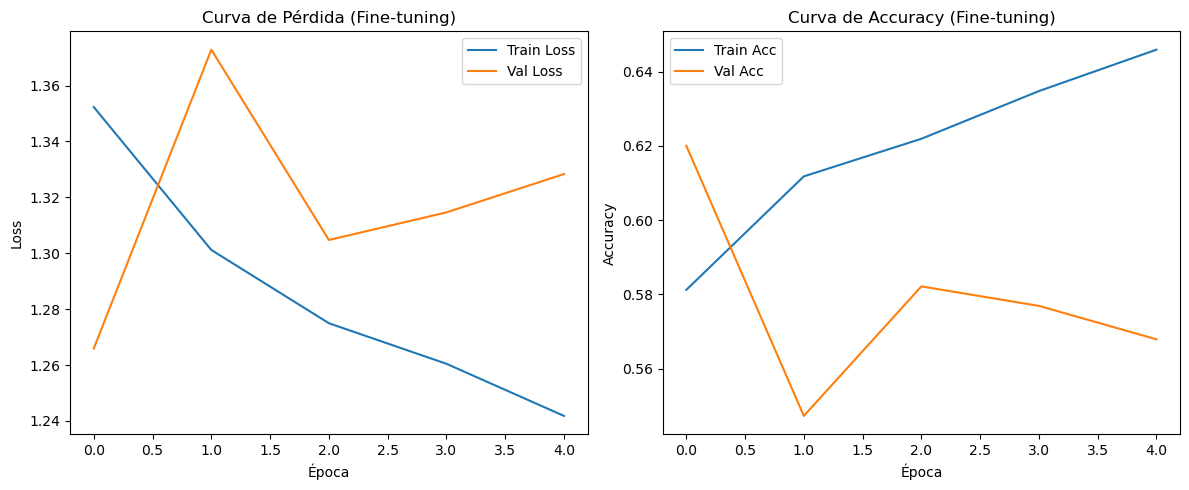

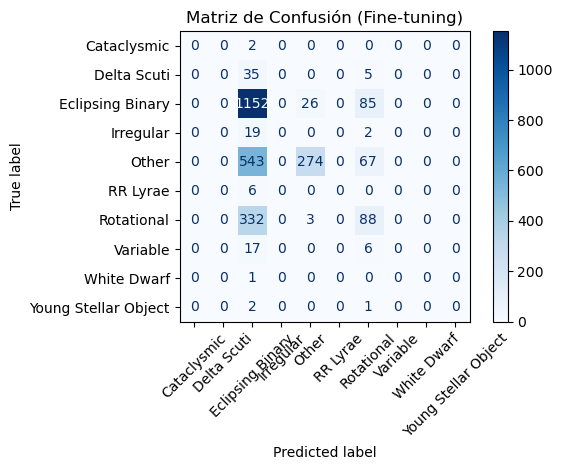

💾 Guardado CSV con errores: outputs/errores_mal_clasificados.csv


In [1]:
from src.fase2.fine_tuning_optimizado2 import main as fine_tuned_optimized_model2
import torch
from torch.utils.data import DataLoader
import pickle
import os
import torch, gc


###################################################
# acciones para resolver los problemas de memoria
# 1. Liberar memoria
gc.collect()
torch.cuda.empty_cache()

# 2. Optimizar fragmentacion
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# 3. Usar batch_size más pequeños (16)
train_dataset = torch.load("data/train/train_dataset.pt")
val_dataset = torch.load("data/train/val_dataset.pt")
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
###################################################

label_encoder = pickle.load(open("data/train/label_encoder.pkl", "rb"))
num_classes = len(label_encoder)

# Fine-tuning optimizado
# Carga desde mejor_modelo_optimizado.pt
# Doble learning rate (encoder: 2e-6, head: 1e-5)
# label_smoothing=0.1 para mejorar la generalización
# Curvas de pérdida y accuracy
# Optimización por AdamW con weight_decay.
print("🚀 Fine-tuning sobre mejor modelo optimizado...")
model = fine_tuned_optimized_model2(
    train_loader=train_loader,
    val_loader=val_loader,
    num_classes=num_classes,
    device="cuda",
    epochs=30,
    patience=4
)